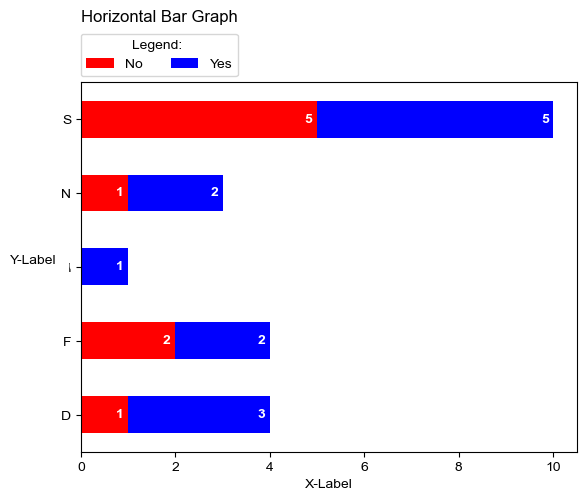

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV data
data = pd.read_csv("csv/bar_assignment.csv")

# Transform COUNT values
data["COUNT"] = data["COUNT"].map({1: "Yes", 0: "No"})

# Count occurrences of Yes and No per LABEL
pivot_data = data.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

plt.rcParams.update({"font.family": "Arial", "font.size": 10})

# Plot
ax = pivot_data.plot(kind="barh", stacked=True, color=["red", "blue"])
for bars in ax.containers:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() - 0.1, 
                bar.get_y() + bar.get_height() / 2, 
                int(bar.get_width()), 
                ha="right", va="center", color="white", fontsize=10, fontweight="bold")
            
plt.xlabel("X-Label")
plt.ylabel("Y-Label", rotation=0, labelpad=20)
# plt.axis([0, 10])
# plt.title("Horizontal Stacked Bar Chart")
plt.legend(bbox_to_anchor=(0.33, 1.15), ncol = 2, title="Legend: ")
plt.title("Horizontal Bar Graph\n\n\n", loc="left")
plt.savefig("horizontal_bar_graph.png", format="png", dpi=300)
plt.show()

In [49]:
import pandas as pd
import plotly.graph_objects as go

# Load data
data = pd.read_csv("csv/sankey_assignment.csv")

# Define the labels for features, central nodes (S, I, D, F, N), and final categories (Reg, Aca, Oth)
feature_labels = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
central_labels = ['S', 'I', 'D', 'F', 'N']
final_labels = ['Reg', 'Aca', 'Oth']

# Extracted colors
colors = [
    "#96cdf6", "#54afa9", "#6d95e6", "#6d9c9f", "#f2a481", "#5481b0", "#f09135", "#f09136",  # Feature labels
    "#55afa9", "#96cdf6", "#f2a481", "#f09135", "#6d9c9f",  # Central labels (S, I, D, F, N)
    "#5481b0", "#6d95e6", "#f09136"  # Final labels (Reg, Aca, Oth)
]

# Complete list of all nodes
labels = feature_labels + central_labels + final_labels

# Mapping for node indices
label_dict = {label: i for i, label in enumerate(labels)}


# Define sources, targets, values, and link colors for the Sankey diagram
sources = []
targets = []
values = []
link_colors = []

# Map 'LABEL' column to central nodes
for index, row in data.iterrows():
    label = row['LABEL']  # 'LABEL' contains the central node values (S, F, D, N, I)
    
    # Connect the feature columns to central nodes (S, I, D, F, N)
    for feature in feature_labels:
        sources.append(label_dict[feature])
        targets.append(label_dict[label])  # Map the label to central node
        values.append(row[feature])
        link_colors.append(colors[label_dict[feature]])  # Assign color based on source node

# Connect central nodes (S, I, D, F, N) to the final labels (Reg, Aca, Oth)
for index, row in data.iterrows():
    label = row['LABEL']  # 'LABEL' contains the central node values (S, F, D, N, I)
    
    for central in central_labels:
        for final in final_labels:
            sources.append(label_dict[central])
            targets.append(label_dict[final])
            values.append(row[final])
            link_colors.append(colors[label_dict[central]])  # Assign color based on source node

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
))

# Adjust the layout
fig.update_layout(
    title_text="Sankey Diagram: Feature to Label Connections",
    font=dict(family="Arial", size=10),
    width=800,
    height=600
)

fig.show()

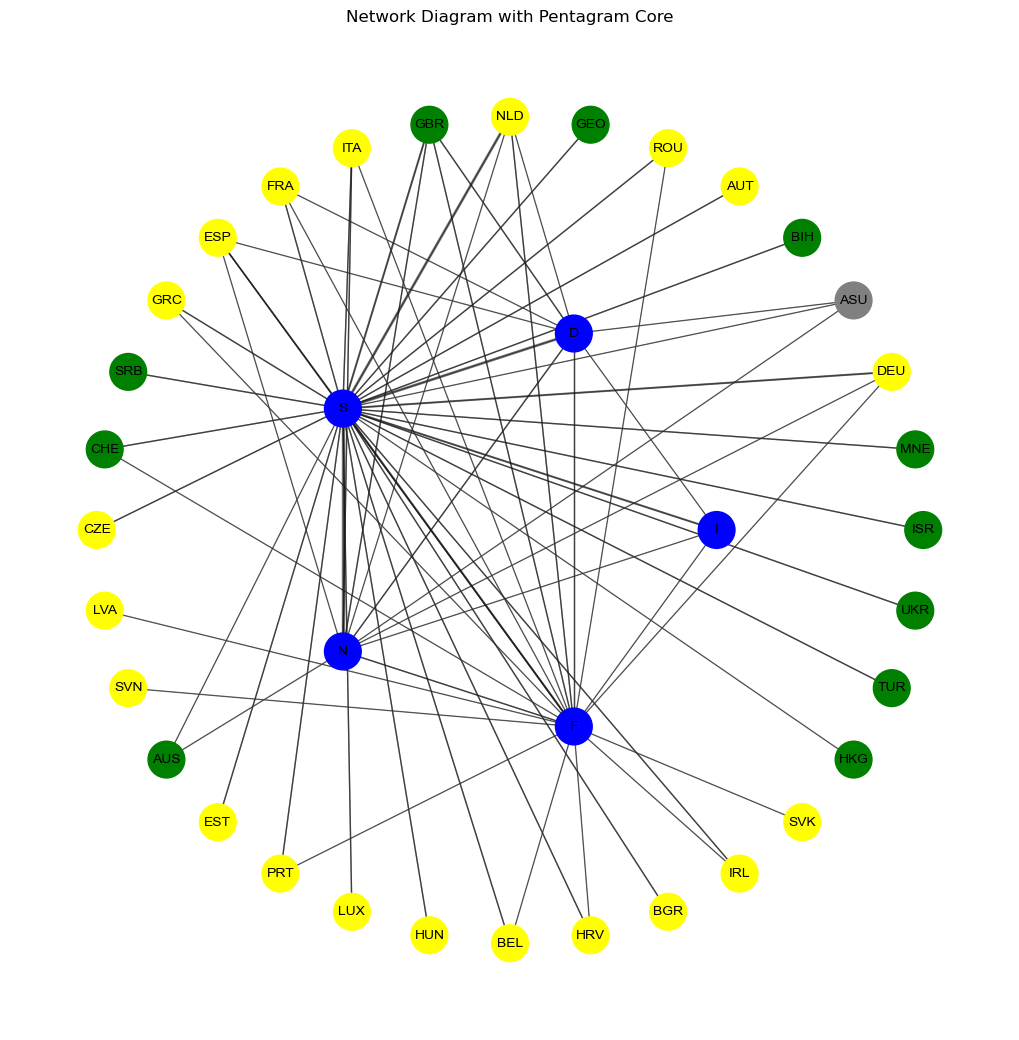

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load CSV data
data = pd.read_csv("csv/networks_assignment.csv")

# Define node categories
center_nodes = {"D", "F", "I", "N", "S"}  # Pentagram nodes
blue_nodes = center_nodes
green_nodes = {"BIH", "GEO", "ISR", "MNE", "SRB", "CHE", "TUR", "UKR", "GBR", "AUS", "HKG", "USA"}
yellow_nodes = {"AUT", "BEL", "BGR", "HRV", "CZE", "EST", "FRA", "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LUX", "NLD", "PRT", "ROU", "SVK", "SVN", "ESP"}

# Create graph
G = nx.Graph()

# Add edges based on the CSV data
for _, row in data.iterrows():
    source = row["LABELS"]
    for target, value in row.items():
        if target != "LABELS" and value > 0:
            G.add_edge(source, target, weight=value)

# Define node positions
pos = {}
angle = np.linspace(0, 2 * np.pi, 6)[:-1]  # 5 points for the pentagram
for i, node in enumerate(center_nodes):
    pos[node] = (np.cos(angle[i]), np.sin(angle[i]))

# Position external nodes in a circular layout around the pentagram
outer_nodes = set(G.nodes()) - center_nodes
outer_pos = nx.circular_layout(outer_nodes, scale=2)
pos.update(outer_pos)

# Assign colors to nodes
color_map = []
for node in G.nodes():
    if node in blue_nodes:
        color_map.append("blue")
    elif node in green_nodes:
        color_map.append("green")
    elif node in yellow_nodes:
        color_map.append("yellow")
    else:
        color_map.append("gray")

# Draw network graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=color_map, edge_color="gray", font_family="Arial", node_size=700, font_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=[G[u][v]["weight"] * 0.5 for u, v in G.edges()])
plt.title("Network Diagram with Pentagram Core")
plt.savefig("network_graph.png", format="png", dpi=300)
plt.show()